In [19]:
# cargar librerías a usar
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd

In [20]:
# Paso 1 - Carga del Conjunto de Datos

df = pd.read_csv("PorcentajeOro2.csv", encoding='latin-1') # Try reading the file using Latin-1 encoding

In [21]:
# Paso 2 - Visualización de una Muestra
df.head()

,Distrito,%Au,peso(grm),tamaño(cm),Densidad(kg/m3),Porocidad(u.p.)
0,1,10,35.00,50.00,1.785714,94.400000
1,1,42,617.40,3704.40,31.500000,98.666667
2,1,5,8.75,6.25,0.446429,88.800000
3,1,78,2129.40,23727.60,108.642857,99.282051
4,2,63,1389.15,12502.35,70.875000,99.111111


In [5]:
# Paso 3 - Normalización de los Datos: No se requiere normalizar

In [22]:
# 4 Construir el modelo de clasificación
import keras
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(6,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Capa de salida para regresión
])

In [23]:
X = df
y = df['%Au']
# dividir los datos en conjuntos de entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='mean_squared_error',  # Error cuadrático medio
              metrics=['mean_absolute_error'])  # Métrica adicional

In [26]:
# 4 Entrenar el modelo
# escalar las caracteristicas usando StandarScaler para asegurar la misma escala en todas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# se crea una instancia de MLPClassifier
mlp_clf = MLPRegressor(hidden_layer_sizes=(100), activation='relu', solver='adam', max_iter=100, random_state=42, verbose=True)

# entrenar el modelo
mlp_clf.fit(X_train_scaled, y_train)

# predecir las etiquetas para el conjunto de prueba
y_pred = mlp_clf.predict(X_test_scaled)

# Instead of accuracy, use regression metrics like Mean Squared Error or Mean Absolute Error
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# Ajustar los valores de la columna '%Au' para que estén en el rango [0, 9]
# The previous lambda function was not subtracting 1 from all values, resulting in values outside [0, 9]
df['%Au'] = df['%Au'].apply(lambda x: max(0, min(9, x - 1)))

# Assuming you want to use '%Au' as the target variable for your Keras model
# Update y_train after modifying df['%Au']
y = df['%Au']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
history = model.fit(X_train, y_train, epochs=10)
# df['position'] = df['position'].apply(lambda x: min(max(0, x - 1), 9))
# history = model.fit(datos_a_normalizar, df['position'], epochs=10)

Iteration 1, loss = 1679.95045988
Iteration 2, loss = 1677.91813364
Iteration 3, loss = 1675.88031161
Iteration 4, loss = 1673.83521835
Iteration 5, loss = 1671.78263641
Iteration 6, loss = 1669.72517847
Iteration 7, loss = 1667.66288430
Iteration 8, loss = 1665.59312138
Iteration 9, loss = 1663.51949057
Iteration 10, loss = 1661.44106474
Iteration 11, loss = 1659.35817548
Iteration 12, loss = 1657.27005085
Iteration 13, loss = 1655.17407876
Iteration 14, loss = 1653.06855766
Iteration 15, loss = 1650.95537206
Iteration 16, loss = 1648.83378639
Iteration 17, loss = 1646.70270510
Iteration 18, loss = 1644.55815179
Iteration 19, loss = 1642.40181428
Iteration 20, loss = 1640.23620716
Iteration 21, loss = 1638.05952579
Iteration 22, loss = 1635.87469478
Iteration 23, loss = 1633.67700646
Iteration 24, loss = 1631.46754234
Iteration 25, loss = 1629.24443825
Iteration 26, loss = 1627.00359686
Iteration 27, loss = 1624.74634180
Iteration 28, loss = 1622.47218163
Iteration 29, loss = 1620.181

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 1/10
5/5 [==============================] - 1s 5ms/step - loss: 1706081.7500 - mean_absolute_error: 639.4380
Epoch 2/10
5/5 [==============================] - 0s 4ms/step - loss: 578904.6875 - mean_absolute_error: 504.7592
Epoch 3/10
5/5 [==============================] - 0s 3ms/step - loss: 64985.4336 - mean_absolute_error: 149.7907
Epoch 4/10
5/5 [==============================] - 0s 4ms/step - loss: 137638.3906 - mean_absolute_error: 210.8031
Epoch 5/10
5/5 [==============================] - 0s 5ms/step - loss: 27582.3652 - mean_absolute_error: 106.5185
Epoch 6/10
5/5 [==============================] - 0s 4ms/step - loss: 32862.3320 - mean_absolute_error: 122.6411
Epoch 7/10
5/5 [==============================] - 0s 4ms/step - loss: 15759.1670 - mean_absolute_error: 67.7436
Epoch 8/10
5/5 [==============================] - 0s 4ms/step - loss: 7971.0479 - mean_absolute_error: 48.6187
Epoch 9/10
5/5 [==============================] - 0s 4ms/step - loss: 8693.4668 - mean_absolute

<Axes: >

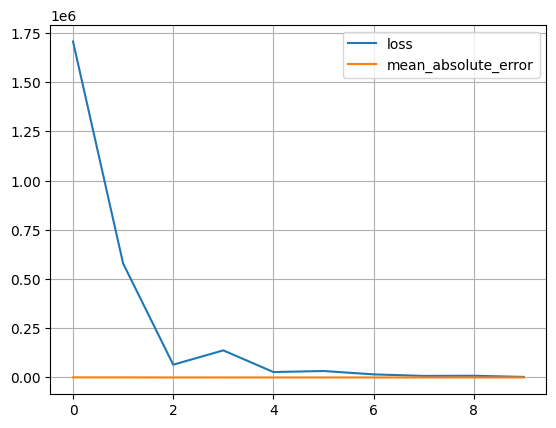

In [27]:
# Graficar el historial de entrenamiento:
import pandas as pd
pd.DataFrame(history.history).plot(grid=True)

In [ ]:
# Evaluar el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(datos_a_normalizar, df['position'])
print(f'loss: {loss}')
print(f'accuracy: {accuracy}')
#

1081/1081 [==============================] - 2s 2ms/step - loss: 1.2271 - accuracy: 0.7136
loss: 1.2270910739898682
accuracy: 0.7136287093162537
